# 0. Introdução

**Trabalho**:

Aluno: Maicon Dall'Agnol

R.A.: 151161868

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Selecionar uma base de dados com dados faltantes
- Executar etapas do pré-processamento:
- - Limpeza
- - Transformação
- - Discretização
- Aplicar algum tipo de visualização dos dados


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Dados

Para realização das tarefas envolvidas no pré-processamento utilizou-se o arquivo **braziltourism.csv** contém dados de um levantamento de turistas brasileiros na Floresta Costeira Atlântica do Brasil (Englin et al., 2003). 

O objetivo da pesquisa foi estudar como o número de viagens para áreas de turismo de aventura na região poderia ser modelado em função das características dos turistas. As informações coletadas incluíam **idade**, **sexo (masculino = 0, feminino = 1)**, **renda familiar mensal** e **custo estimado de viagem (em dólares)** do entrevistado, o **número de atividades de aventura** (por exemplo, montanhismo e caminhada) e **atividades passivas** (por exemplo, passeios e piqueniques), o participante participou, e a **importância para o entrevistado de pavimentar a estrada de acesso** para a região. Os dados fornecidos aqui são para pessoas pesquisadas fora da região de aventura.

## 1.1 Informações sobre os dados:

#### Atributos:
- Age: Idade
- Sex: Sexo (0 - masculino / 1 - feminino)
- Income: Renda (em U\$)
- Travel_cost: Custo estimado da viagem (em U\$)
- Access_road: Importância para o entrevistado de pavimentar a estrada de acesso
- Active: Número de atividades ativas
- Passive: Número de atividades passivas
- Logged_income: ?

#### Classe:
- Trips: Viagens



## 1.2 Carregamento e avaliação inicial

In [2]:
data = pd.read_csv('dados/braziltourism.csv')

In [3]:
data.head(15)

,Age,Sex,Income,Travel_cost,Access_road,Active,Passive,Logged_income,Trips
0,35,0,250,48.0003,1,1,0,5.521460918,0
1,25,1,218.75,52.2,0,2,2,5.387929525,0
2,37,0,1875,163.5,0,0,0,7.536363938,0
3,29,1,781.25,87,0,0,0,6.660895201,0
4,54,0,562.5,21,0,0,0,6.332391134,0
5,34,0,218.75,60,1,0,1,5.387929525,0
6,40,0,468.75,56.4,1,0,0,6.150069577,0
7,32,1,2187.5,48.0003,0,1,1,7.690514618,0
8,62,1,781.25,56.4,0,2,2,6.660895201,0
9,36,1,937.5,48.0003,0,2,1,6.843216758,0


In [4]:
data.describe()

,Access_road,Trips
count,412.000000,412.000000
mean,0.174757,0.366505
std,0.380221,0.865193
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,7.000000


# 2. Aplicação de algoritmos

#### Problemas idenficados:
- 1. Dados faltantes representados por "?"
- 2. Dados faltantes
- 3. Dados fora de uma normalização

#### Resolvendo problema 1

In [5]:
# Função de contagem de letras em qualquer base

def count_letter(data, letter):
    name_letter = 'Número de ' + letter
    data_question_mark = pd.DataFrame(columns=['Atributo', name_letter])
    
    for atributo in data.columns:
        dic = {'Atributo' : atributo, name_letter: 0 }
        
        for i in range(len(data[atributo])):
            if data[atributo][i] == letter:
                dic[name_letter] = dic[name_letter] + 1

        data_question_mark = data_question_mark.append(dic, ignore_index=True)
    return data_question_mark

In [6]:
count_letter(data,'?')

,Atributo,Número de ?
0,Age,1
1,Sex,1
2,Income,44
3,Travel_cost,3
4,Access_road,0
5,Active,2
6,Passive,1
7,Logged_income,44
8,Trips,0


In [7]:
# Transformação de um caractere em NaN

def transform_to_null(data_entry, letter):
    data = data_entry.copy()
    
    for atributo in data.columns:        
        for i in range(len(data[atributo])):
            if data[atributo][i] == letter:
                data.loc[i, atributo] = math.nan
    
    return data

In [8]:
data = transform_to_null(data,'?')
data.head(15)

,Age,Sex,Income,Travel_cost,Access_road,Active,Passive,Logged_income,Trips
0,35,0,250,48.0003,1,1,0,5.521460918,0
1,25,1,218.75,52.2,0,2,2,5.387929525,0
2,37,0,1875,163.5,0,0,0,7.536363938,0
3,29,1,781.25,87,0,0,0,6.660895201,0
4,54,0,562.5,21,0,0,0,6.332391134,0
5,34,0,218.75,60,1,0,1,5.387929525,0
6,40,0,468.75,56.4,1,0,0,6.150069577,0
7,32,1,2187.5,48.0003,0,1,1,7.690514618,0
8,62,1,781.25,56.4,0,2,2,6.660895201,0
9,36,1,937.5,48.0003,0,2,1,6.843216758,0


#### Resolvendo problema 2

Diversas alternativas podem ser tomadas para correção dos dados faltantes, para os valores da bases adotou-se a estratégia de usar a média do atributo para o preenchimento

In [9]:
# Função para calcular a média contendo atributos vazios no DataFrame

def mean_attribute(atributo):
    conta_linha = soma_media = 0
    for numero in atributo:
        if not math.isnan(numero):
            soma_media += numero
            conta_linha +=1
            
    return float(soma_media/conta_linha)

In [10]:
# Transforma os dados que estão em string para float para aplicar a função mean_attribute()

for atributo in data.columns:
    for linha in range(len(data[atributo])):
        if isinstance(data[atributo][linha], str):
            data.loc[linha, atributo] = float(data[atributo][linha])

In [11]:
# Atribui para os valores faltantes a média do atributo

for atributo in data.columns:
    media_atributo = mean_attribute(data[atributo])
    
    for linha in range(len(data[atributo])):
        if math.isnan(data[atributo][linha]):
            data.loc[linha, atributo] = media_atributo

In [12]:
# Arredonda para atributos selecionados

atributos_selecionados = ['Age','Sex','Access_road','Active','Passive']

for atributo in atributos_selecionados:
    for linha in range(len(data[atributo])):
        data.loc[linha, atributo] = np.float64(round(data[atributo][linha]))

In [13]:
data.head(15)

,Age,Sex,Income,Travel_cost,Access_road,Active,Passive,Logged_income,Trips
0,35.0,0.0,250,48.0003,1.0,1.0,0.0,5.52146,0
1,25.0,1.0,218.75,52.2,0.0,2.0,2.0,5.38793,0
2,37.0,0.0,1875,163.5,0.0,0.0,0.0,7.53636,0
3,29.0,1.0,781.25,87,0.0,0.0,0.0,6.6609,0
4,54.0,0.0,562.5,21,0.0,0.0,0.0,6.33239,0
5,34.0,0.0,218.75,60,1.0,0.0,1.0,5.38793,0
6,40.0,0.0,468.75,56.4,1.0,0.0,0.0,6.15007,0
7,32.0,1.0,2187.5,48.0003,0.0,1.0,1.0,7.69051,0
8,62.0,1.0,781.25,56.4,0.0,2.0,2.0,6.6609,0
9,36.0,1.0,937.5,48.0003,0.0,2.0,1.0,6.84322,0


In [14]:
data.isnull().sum()

Age              0
Sex              0
Income           0
Travel_cost      0
Access_road      0
Active           0
Passive          0
Logged_income    0
Trips            0
dtype: int64

#### Resolvendo problema 3

StandardScaler padroniza os recursos removendo a média e o dimensionamento para a variância 

In [15]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data.drop(columns=['Trips']), y = data.Trips)

In [16]:
data_scaler

array([[ 0.05998793, -0.87956815, -1.08342098, ..., -0.01413951,
        -0.90947806, -1.34671267],
       [-0.76660165,  1.01772021, -1.12651377, ...,  0.81807165,
         1.11595417, -1.50783244],
       [ 0.22530585, -0.87956815,  1.15740421, ..., -0.84635067,
        -0.90947806,  1.08448136],
       ...,
       [-1.01457852, -0.87956815, -1.16960657, ...,  4.14691628,
         0.10323805, -1.69383158],
       [-0.8492606 , -0.87956815, -1.07427841, ..., -0.84635067,
        -0.90947806, -1.31513043],
       [ 2.62241563, -0.87956815, -0.13537955, ..., -0.84635067,
        -0.90947806,  0.24812583]])

# 3. Visualização

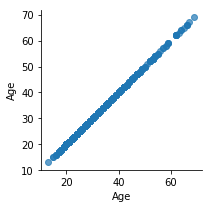

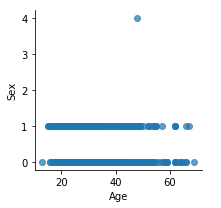

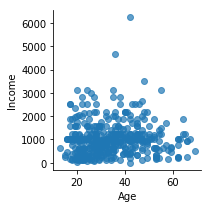

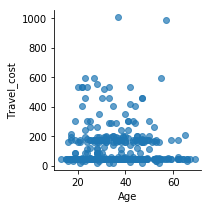

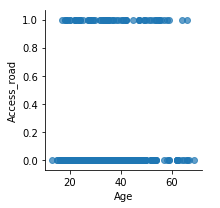

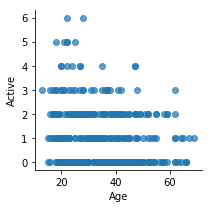

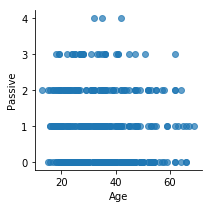

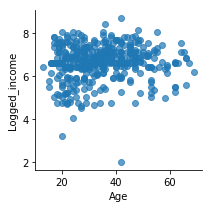

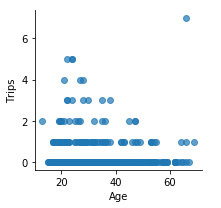

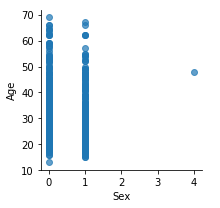

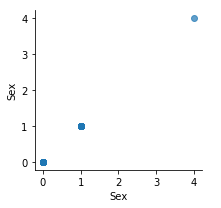

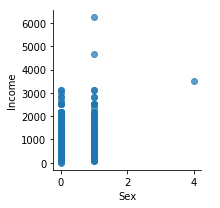

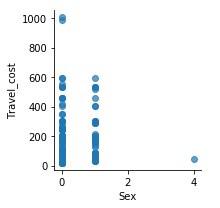

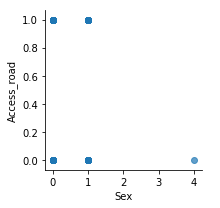

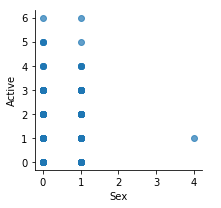

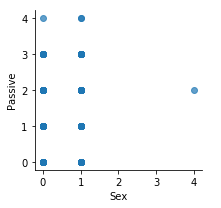

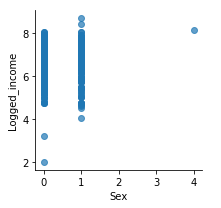

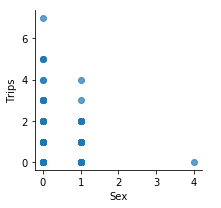

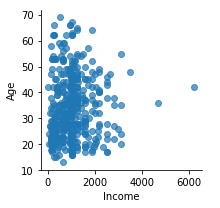

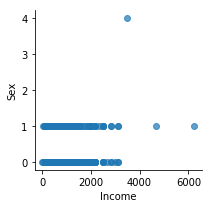

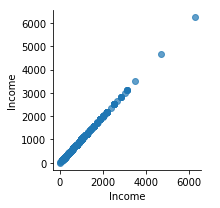

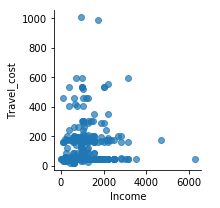

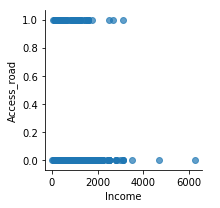

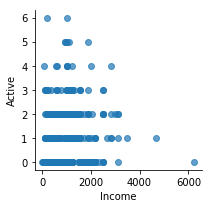

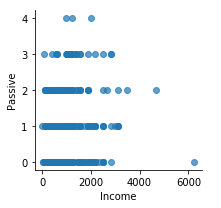

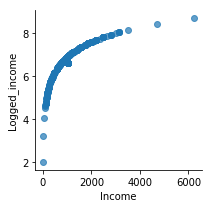

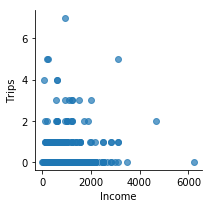

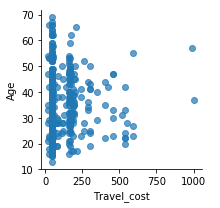

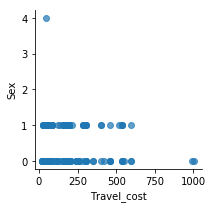

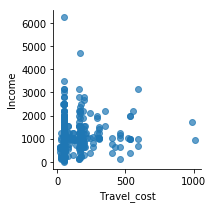

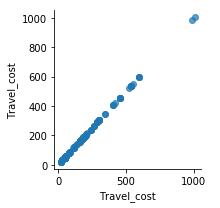

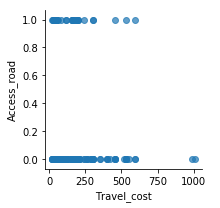

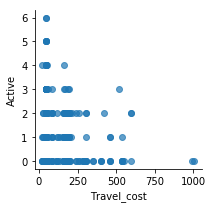

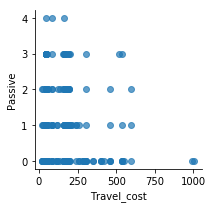

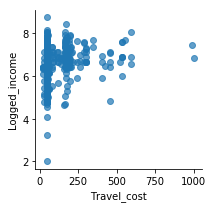

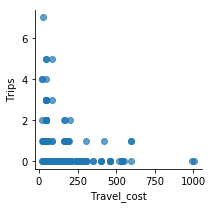

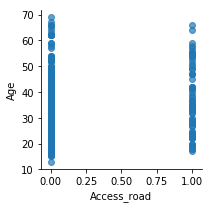

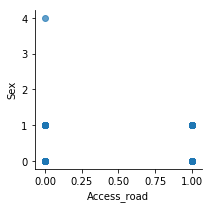

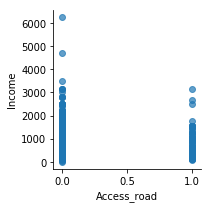

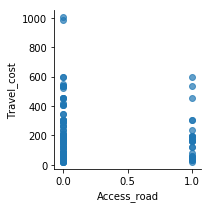

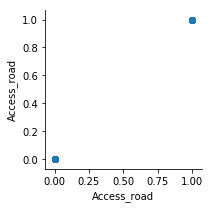

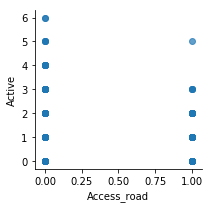

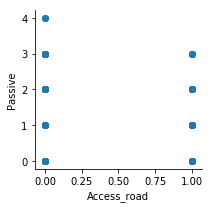

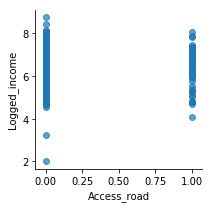

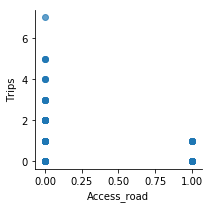

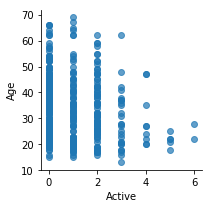

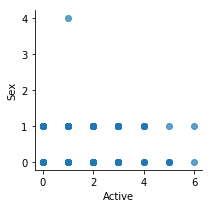

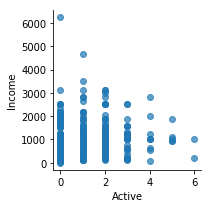

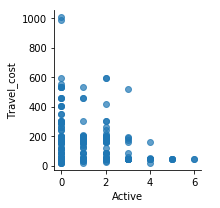

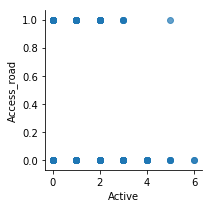

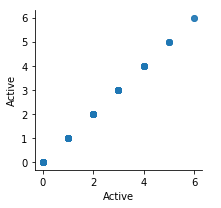

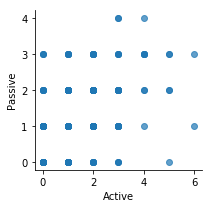

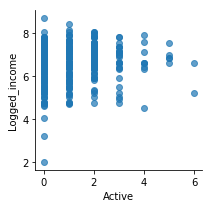

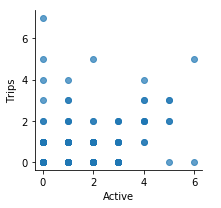

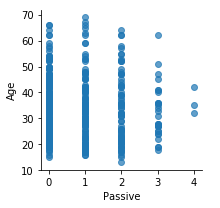

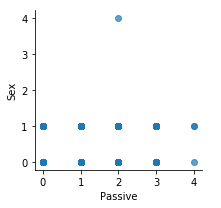

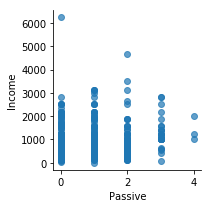

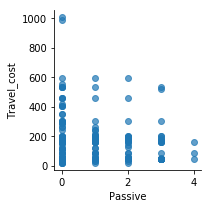

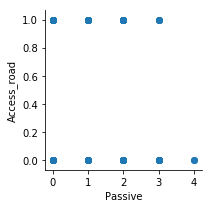

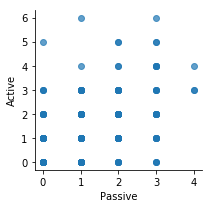

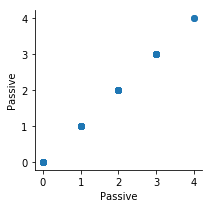

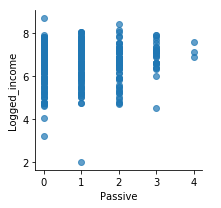

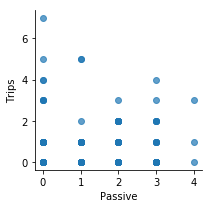

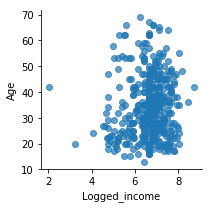

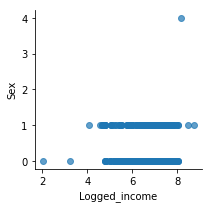

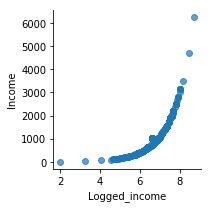

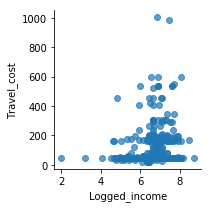

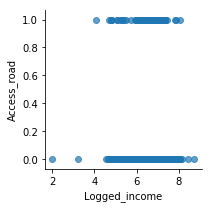

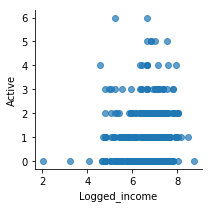

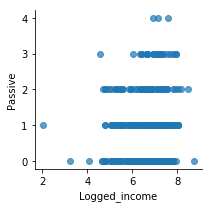

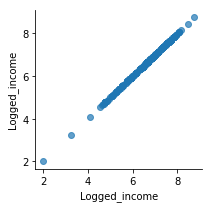

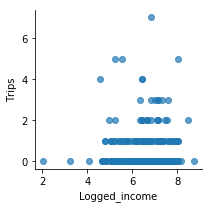

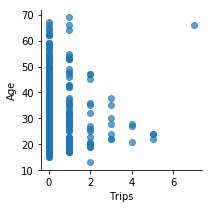

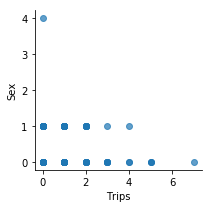

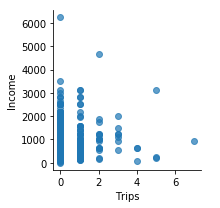

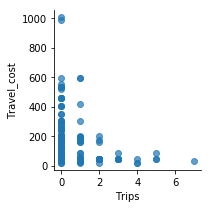

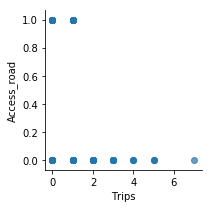

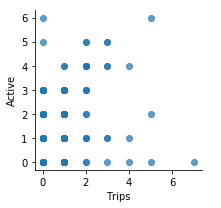

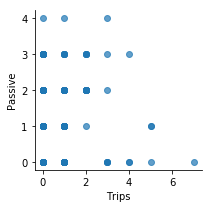

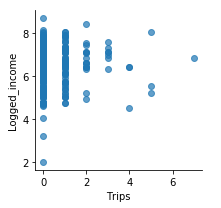

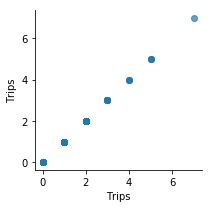

In [17]:
for atributo1 in data.columns:
    for atributo2 in data.columns:
        g = sns.FacetGrid(data, margin_titles=True)
        g.map(plt.scatter, atributo1, atributo2, alpha=.7)
        g.add_legend();
        g.

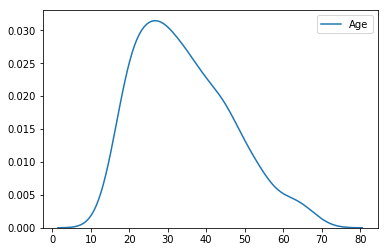

In [18]:
sns.kdeplot(data.Age)

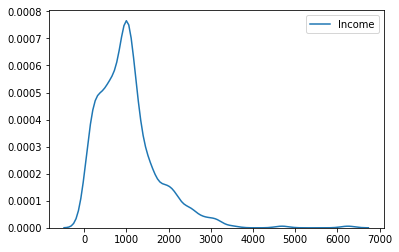

In [19]:
sns.kdeplot(data.Income)

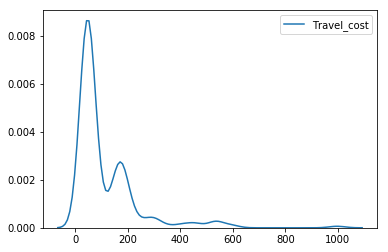

In [20]:
sns.kdeplot(data.Travel_cost)